In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

import random
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from utils.load_networkx import networkx_feat
from utils.macro_dataset import MacroDataset
from utils import macro_unsupervised as unsup
from utils.macro_supervised import MacroSupervised
from utils.macro_attribution import Attribution
from utils import plot

**Filepaths**

MON_SMILES : .csv or .txt file of macromolecule monomers
<br>
BOND_SMILES : .csv or .txt file of macromolecule bonds

TXT_DATA_PATH : For dataset, to be used for training
<br>
DF_PATH : For dataset, to be used for graph labels during training
<br>
MODEL_PATH : For models, to be used when training to save the model, optimizer, and configuration file
<br>
FIG_PATH : For plots, to be used when saving ROC-AUC or parity plot figures

In [2]:
MON_SMILES = './tables/SMILES_glycans_monomer.txt'
BOND_SMILES = './tables/SMILES_glycans_bond.txt'

TXT_DATA_PATH = './dataset/graphs/'
DF_PATH = './tables/glycan_binding.txt'
MODEL_PATH = './'
FIG_PATH = './'

**Variables**

FEAT : Type of features for macromolecule monomers and bonds -- fingerprints ('fp') or one-hot encodings ('onehot') (default = 'fp')
<br>
FP_RADIUS_MON : Radius of topological exploration for monomer fingerprint (default = 3)
<br>
FP_BITS_MON : Size of fingerprint bit-vector for monomer (default = 128)
<br>
FP_RADIUS_BOND : Radius of topological exploration for bond fingerprint (default = 3)
<br>
FP_BITS_BOND : Size of fingerprint bit-vector for bond (default = 16)

SEED : Random seed for shuffling dataset (default = 108)
<br>
TASK : Learning task (classification, regression) (default = 'classification')
<br>
MODEL : Model architecture for supervised learning (Weave, MPNN, Attentive FP, GCN, GAT) (default = 'Weave')
<br>
LABELNAME : Name of label to classify (default = 'Immunogenic')
<br>
SPLIT : Proportion of the dataset to use for training, validation and test (default = '0.8,0.1,0.1')
<br>
NORM: Normalization method for regression labels -- quantile transform ('qt') or standard scaler ('ss') (default = 'qt')

NUM_EPOCHS: Maximum number of epochs allowed for training (default = 1000)
<br>
NUM_WORKERS: Number of processes for data loading (default: 1)

SAVE_MODEL: Whether to save full model file. Model state dict will be saved automatically (default = False)
<br>
SAVE_OPT: Whether to save optimizer files (default = False)
<br>
SAVE_CONFIG: Whether to save configuration file (default = False)

PLOT_TYPE: Dataset to plot ('val' for validation or 'test' for test)

CUSTOM_PARAMS: Dictionary of hyperparameters for model

In [3]:
FEAT = 'fp'
FP_RADIUS_MON = 3
FP_BITS_MON = 128
FP_RADIUS_BOND = 3
FP_BITS_BOND = 16

SEED = 108
TASK = 'regression'
MODEL = 'GCN'
LABELNAME = '22_Conc180.0'
SPLIT = '0.6,0.2,0.2'
NORM = 'ss'

NUM_EPOCHS = 10
NUM_WORKERS = 1

SAVE_MODEL = False
SAVE_OPT = False
SAVE_CONFIG = False

PLOT_TYPE = 'val'

CUSTOM_PARAMS = {}

**Load featurized NetworkX graphs**

In [4]:
NX_GRAPHS = networkx_feat(
    TXT_DATA_PATH = TXT_DATA_PATH, 
    MON_SMILES = MON_SMILES, 
    BOND_SMILES = BOND_SMILES, 
    FEAT = FEAT, 
    FP_RADIUS_MON = FP_RADIUS_MON, 
    FP_RADIUS_BOND = FP_RADIUS_BOND, 
    FP_BITS_MON = FP_BITS_MON, 
    FP_BITS_BOND = FP_BITS_BOND
)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


{0: 'GalNAc'}


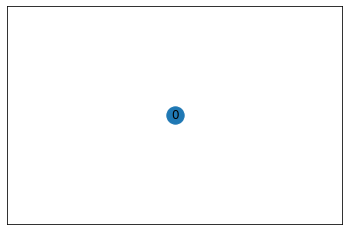

In [5]:
plot.graph(NX_GRAPHS['CFG-10-Sp15'])

{0: 'Fuc', 1: 'Gal', 2: 'GlcNAc', 3: 'Man', 4: 'Fuc', 5: 'Gal', 6: 'GlcNAc', 7: 'Fuc', 8: 'Gal', 9: 'GlcNAc', 10: 'Man', 11: 'Man', 12: 'GlcNAc', 13: 'GlcNAc'}


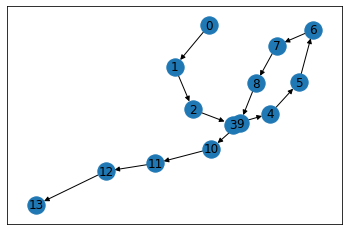

In [6]:
plot.graph(NX_GRAPHS['CFG-471-Sp12'])

#### Alignment of 2 arbitrary graphs - Similarity Computation

In [7]:
#unsup.edit_distance(NX_GRAPHS['GBID10271'], NX_GRAPHS['GBID10330'], node_attr = 'h', edge_attr = 'e', upper_bound = 100)

#### Unsupervised Learning

In [8]:
# sim_matrix = unsup.similarity_matrix(dict_graphs = NX_GRAPHS)

In [9]:
# embeddings = unsup.dimensionality_reduction(
#     matrix = sim_matrix, 
#     method = 'umap', 
#     n_neighbors=3)

In [10]:
# unsup.plot_embeddings(
#     embeddings = embeddings, 
#     NX_GRAPHS = NX_GRAPHS, 
#     DF_PATH = DF_PATH, 
#     method = 'UMAP')

**Load DGL dataset with labels and masks**

In [11]:
dgl_dict = MacroDataset(
    DF_PATH = DF_PATH, 
    SEED = SEED, 
    TASK = TASK, 
    LABELNAME = LABELNAME, 
    MODEL = MODEL, 
    NX_GRAPHS = NX_GRAPHS, 
    NORM = NORM)

#### Supervised learning 
Training model and obtaining validation and test metrics

In [12]:
random.seed(SEED)

macro_supervised = MacroSupervised(
    MacroDataset = dgl_dict, 
    MON_SMILES = MON_SMILES, 
    BOND_SMILES = BOND_SMILES, 
    FEAT = FEAT, 
    FP_BITS_MON = FP_BITS_MON, 
    FP_BITS_BOND = FP_BITS_BOND, 
    SEED = SEED, 
    MODEL = MODEL, 
    SPLIT = SPLIT, 
    NUM_EPOCHS = NUM_EPOCHS, 
    NUM_WORKERS = NUM_WORKERS, 
    CUSTOM_PARAMS = CUSTOM_PARAMS, 
    MODEL_PATH = MODEL_PATH, 
    SAVE_MODEL = SAVE_MODEL, 
    SAVE_OPT = SAVE_OPT, 
    SAVE_CONFIG = SAVE_CONFIG)

Directory ./ already exists.


In [13]:
macro_supervised.main()

epoch 1/10, batch 1/1, loss 1.1576
epoch 1/10, validation rmse 2.7913, best validation rmse 2.7913, validation L1loss 0.8938, validation r2 0.2648, validation mae 1.8731, validation spearmanr -0.3967, validation kendalltau -0.2843
epoch 2/10, batch 1/1, loss 1.2558
epoch 2/10, validation rmse 2.7348, best validation rmse 2.7348, validation L1loss 0.8207, validation r2 0.4271, validation mae 1.7709, validation spearmanr -0.4454, validation kendalltau -0.2964
epoch 3/10, batch 1/1, loss 0.9710
EarlyStopping counter: 1 out of 30
epoch 3/10, validation rmse 3.9664, best validation rmse 2.7348, validation L1loss 1.2632, validation r2 0.4397, validation mae 2.5244, validation spearmanr -0.4059, validation kendalltau -0.2802
epoch 4/10, batch 1/1, loss 0.8887
EarlyStopping counter: 2 out of 30
epoch 4/10, validation rmse 4.4405, best validation rmse 2.7348, validation L1loss 1.4412, validation r2 0.3629, validation mae 2.8306, validation spearmanr -0.3624, validation kendalltau -0.2458
epoch 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


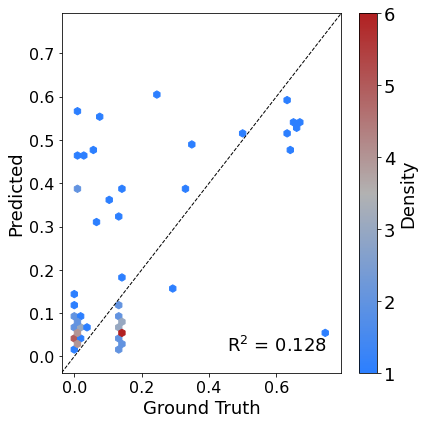

In [14]:
macro_supervised.parity_plot('test','./')

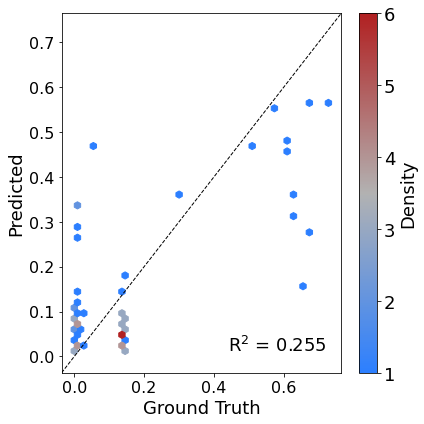

In [15]:
macro_supervised.parity_plot('val','./')

In [16]:
# macro_supervised.rocauc_plot('test', './')

#### Attribution

In [17]:
# random.seed(SEED)
# input_graph = dgl_dict.graphs[0]

# attribution = Attribution(
#     model_name = MODEL, 
#     attribution_type = 'integrated_gradients')

# attribution.calculate_attribution(
#     model_instance = macro_supervised.model, 
#     input_graph = input_graph)

In [18]:
# attribution.plot_graph(
#     input_graph = input_graph, 
#     NX_GRAPHS = NX_GRAPHS)

In [19]:
# attribution.plot_fp(node_idx=0)

In [20]:
# index = 16
# mol, bi = attribution.display_substructure(
#     monomer = 'Xyl', 
#     MON_SMILES_PATH = MON_SMILES, 
#     RADIUS = FP_RADIUS_MON, 
#     N_BITS = FP_BITS_MON)
# Draw.DrawMorganBit(mol, index, bi)